In [1]:
import pandas as pd
import numpy as np
import os
pd.options.display.max_rows = 500
pd.options.display.max_columns = 200
import datetime
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime, date
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")
old_data_folder = '/Users/simonneumeyer/Dropbox/DO-FILES/data/'


Bad key "text.kerning_factor" on line 4 in
/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
out_of_sample = True
impute_na = True

# Load and process data

In [3]:
#df = pd.read_stata('../../data/output/firm_year_level.dta')

# without imputation
df = pd.read_stata('../../data/output/firm_year_level_zeros.dta')

In [4]:
#df[[x for x in df.columns if 'municipality' in x]]

In [5]:
df.credit_treatment_status.value_counts()
df.type_firm_2015.value_counts().index.tolist()

['No loan (2016-2018)', 'Loan (2016-2018)', 'KCGF loan (2016-2018)']

Both active=1, 2015, Keep only micro small and medium firms

In [6]:
# keep only active firms in 2015 
df = df[df.active=='Active firm in year t']
df = df[df.period==2015]

In [7]:
# impute missing data with size_creditdata column
df['size_creditdata'] = df['size_creditdata'].map(
    {'Micro': 'Micro (0-9)',
     'Small': 'Small (10-49)',
     'Medium': 'Medium (50-249)',
     'Large': 'Large (250+)',
     'N/A': np.nan
    }
)

df['size'] = df['size'].fillna(df.size_creditdata)

df['size'] = df['size'].map({
    'Micro (0-9)': 1,
    'Small (10-49)': 2,
    'Medium (50-249)': 3,
    'Large (250+)': 4,
}).astype(float)

In [8]:
df['size'].value_counts(dropna=False)

1.0    25616
NaN    10601
2.0     2002
3.0      305
4.0       49
Name: size, dtype: int64

In [9]:
# drop large firms but keep NaNs
df = df[(df['size']!=4) | (df['size'].isna())]

In [10]:
df['size'].value_counts(dropna=False)

1.0    25616
NaN    10601
2.0     2002
3.0      305
Name: size, dtype: int64

In [11]:
df['export_tx'] = df['export_tx'].map({
    'No export firm': 0,
    'Export firm': 1,
}).astype(float)

df['import_tx'] = df['import_tx'].map({
    'No import firm': 0,
    'Import firm': 1,
}).astype(float)

In [12]:
df['firms_age_squared'] = df.firms_age ** 2

df['num_loans_squared'] = df.num_loans ** 2
df['lag1_num_loans_squared'] = df.lag1_num_loans ** 2
df['lag2_num_loans_squared'] = df.lag2_num_loans ** 2
df['lag3_num_loans_squared'] = df.lag3_num_loans ** 2
df['lag4_num_loans_squared'] = df.lag4_num_loans ** 2
df['lag5_num_loans_squared'] = df.lag5_num_loans ** 2

df['productivity_r_squared'] = df.productivity_r ** 2
df['lag1_productivity_r_squared'] = df.lag1_productivity_r ** 2
df['lag2_productivity_r_squared'] = df.lag2_productivity_r ** 2
df['lag3_productivity_r_squared'] = df.lag3_productivity_r ** 2
df['lag4_productivity_r_squared'] = df.lag4_productivity_r ** 2
df['lag5_productivity_r_squared'] = df.lag5_productivity_r ** 2

df['employees_squared'] = df.employees ** 2
df['lag1_employees_squared'] = df.lag1_employees ** 2
df['lag2_employees_squared'] = df.lag2_employees ** 2
df['lag3_employees_squared'] = df.lag3_employees ** 2
df['lag4_employees_squared'] = df.lag4_employees ** 2
df['lag5_employees_squared'] = df.lag5_employees ** 2

df['wages_worker_r_squared'] = df.wages_worker_r ** 2
df['lag1_wages_worker_r_squared'] = df.lag1_wages_worker_r ** 2
df['lag2_wages_worker_r_squared'] = df.lag2_wages_worker_r ** 2
df['lag3_wages_worker_r_squared'] = df.lag3_wages_worker_r ** 2
df['lag4_wages_worker_r_squared'] = df.lag4_wages_worker_r ** 2
df['lag5_wages_worker_r_squared'] = df.lag5_wages_worker_r ** 2

df['export_tx_squared'] = df.export_tx ** 2
df['lag1_export_tx_squared'] = df.lag1_export_tx ** 2
df['lag2_export_tx_squared'] = df.lag2_export_tx ** 2
df['lag3_export_tx_squared'] = df.lag3_export_tx ** 2
df['lag4_export_tx_squared'] = df.lag4_export_tx ** 2
df['lag5_export_tx_squared'] = df.lag5_export_tx ** 2

df['import_tx_squared'] = df.import_tx ** 2
df['lag1_import_tx_squared'] = df.lag1_import_tx ** 2
df['lag2_import_tx_squared'] = df.lag2_import_tx ** 2
df['lag3_import_tx_squared'] = df.lag3_import_tx ** 2
df['lag4_import_tx_squared'] = df.lag4_import_tx ** 2
df['lag5_import_tx_squared'] = df.lag5_import_tx ** 2

df['size_squared'] = df['size'] ** 2
df['lag1_size_squared'] = df.lag1_size ** 2
df['lag2_size_squared'] = df.lag2_size ** 2
df['lag3_size_squared'] = df.lag3_size ** 2
df['lag4_size_squared'] = df.lag4_size ** 2
df['lag5_size_squared'] = df.lag5_size ** 2

df['turnover_r_squared'] = df.turnover_r ** 2
df['lag1_turnover_r_squared'] = df.lag1_turnover_r ** 2
df['lag2_turnover_r_squared'] = df.lag2_turnover_r ** 2
df['lag3_turnover_r_squared'] = df.lag3_turnover_r ** 2
df['lag4_turnover_r_squared'] = df.lag4_turnover_r ** 2
df['lag5_turnover_r_squared'] = df.lag5_turnover_r ** 2

df['number_loans_up2015_squared'] = df.number_loans_up2015 ** 2

In [13]:
# dummies
df[
    ['sectionid', 'municipalityid', 'legalformid']] = df[
    ['sectionid', 'municipalityid', 'legalformid']].astype(str)

df_dummies = pd.get_dummies(df[[
    'legalformid',
    'sectionid',
    'municipalityid',
    'ethnicity',
]])

In [14]:
covars = ['firms_age', 'firms_age_squared', 
          
          'productivity_r', 'lag1_productivity_r', 'lag2_productivity_r', 
          'lag3_productivity_r', 'lag4_productivity_r', 'lag5_productivity_r',
          'productivity_r_squared', 'lag1_productivity_r_squared', 'lag2_productivity_r_squared', 
          'lag3_productivity_r_squared', 'lag4_productivity_r_squared', 'lag5_productivity_r_squared', 
          
          'wages_worker_r', 'lag1_wages_worker_r', 'lag2_wages_worker_r', 
          'lag3_wages_worker_r', 'lag4_wages_worker_r', 'lag5_wages_worker_r',
          'wages_worker_r_squared', 'lag1_wages_worker_r_squared', 'lag2_wages_worker_r_squared', 
          'lag3_wages_worker_r_squared', 'lag4_wages_worker_r_squared', 'lag5_wages_worker_r_squared', 
          
          'num_loans', 'lag1_num_loans', 'lag2_num_loans',
          'lag3_num_loans', 'lag4_num_loans', 'lag5_num_loans', 
          'num_loans_squared',  'lag1_num_loans_squared', 'lag2_num_loans_squared',
          'lag3_num_loans_squared',  'lag4_num_loans_squared', 'lag5_num_loans_squared',
          
          'exports_amount_r', 'imports_amount_r',

          'import_tx', 'lag1_import_tx', 'lag2_import_tx',
          'lag3_import_tx', 'lag4_import_tx', 'lag5_import_tx', 
          'import_tx_squared',  'lag1_import_tx_squared', 'lag2_import_tx_squared',
          'lag3_import_tx_squared',  'lag4_import_tx_squared', 'lag5_import_tx_squared',

          'export_tx', 'lag1_export_tx', 'lag2_export_tx',
          'lag3_export_tx', 'lag4_export_tx', 'lag5_export_tx', 
          'export_tx_squared',  'lag1_export_tx_squared', 'lag2_export_tx_squared',
          'lag3_export_tx_squared',  'lag4_export_tx_squared', 'lag5_export_tx_squared',
      
          'size', 
          'lag1_size', 'lag2_size',
          'lag3_size', 'lag4_size', 'lag5_size', 
          'size_squared',
          'lag1_size_squared', 'lag2_size_squared',
          'lag3_size_squared',  'lag4_size_squared', 'lag5_size_squared',

          'turnover_r', 'lag1_turnover_r', 'lag2_turnover_r',
          'lag3_turnover_r', 'lag4_turnover_r', 'lag5_turnover_r', 
          'turnover_r_squared',  'lag1_turnover_r_squared', 'lag2_turnover_r_squared',
          'lag3_turnover_r_squared',  'lag4_turnover_r_squared', 'lag5_turnover_r_squared',
          
          'employees', 'lag1_employees', 'lag2_employees', 'lag3_employees',
          'lag4_employees', 'lag5_employees',
          'employees_squared', 'lag1_employees_squared', 'lag2_employees_squared',
          'lag3_employees_squared', 'lag4_employees_squared', 'lag5_employees_squared',
          'number_loans_up2015', 'number_loans_up2015_squared',

          
          #'ethnicity',
          #'loanamount_r', 'disbursedamount_r', #'irate_effec',
         
         ] + df_dummies.columns.tolist()

# drop variables with lot of missing values
#covars = list(set(covars) - set(
#    ['lag5_wages_worker_r_squared','lag5_wages_worker_r','lag5_productivity_r','lag5_productivity_r_squared',
#     'lag5_employees_squared','lag5_employees','lag4_wages_worker_r','lag4_wages_worker_r_squared','lag5_size',
#     'lag5_size_squared','lag4_productivity_r','lag4_productivity_r_squared','exports_amount_r','imports_amount_r',
#     'lag4_employees','lag4_employees_squared','lag3_wages_worker_r_squared','lag3_wages_worker_r',
#     'lag4_size_squared','lag4_size','lag3_productivity_r_squared','lag3_productivity_r','lag2_wages_worker_r',
#     'lag2_wages_worker_r_squared','lag3_employees_squared','lag3_employees','lag3_size','lag3_size_squared']
#)
#             )


## per Vivian's email:
#df_dummies = pd.get_dummies(df[['sectionid']])
#covars = [
#    'employees', 'lag1_employees', 'employees_squared', 'lag1_employees_squared',
#    'number_loans_up2015', 'number_loans_up2015_squared',
#    'num_loans', 'num_loans_squared', 'lag1_num_loans', 'lag1_num_loans_squared',
#    'lag2_num_loans', 'lag2_num_loans_squared', 'lag3_num_loans', 'lag3_num_loans_squared',
#    'productivity_r', 'lag1_productivity_r', 'productivity_r_squared', 'lag1_productivity_r_squared', 
#    'wages_worker_r', 'lag1_wages_worker_r', 'wages_worker_r_squared', 'lag1_wages_worker_r_squared', 
#    'import_tx', 'export_tx',
#    'firms_age', 'firms_age_squared',
#    
##    'turnover_r', 'lag1_turnover_r', 'turnover_r_squared', 'lag1_turnover_r_squared',
##    'size', 'lag1_size','size_squared',  'lag1_size_squared'
#    
#] + df_dummies.columns.tolist()

In [15]:
covars

['firms_age',
 'firms_age_squared',
 'productivity_r',
 'lag1_productivity_r',
 'lag2_productivity_r',
 'lag3_productivity_r',
 'lag4_productivity_r',
 'lag5_productivity_r',
 'productivity_r_squared',
 'lag1_productivity_r_squared',
 'lag2_productivity_r_squared',
 'lag3_productivity_r_squared',
 'lag4_productivity_r_squared',
 'lag5_productivity_r_squared',
 'wages_worker_r',
 'lag1_wages_worker_r',
 'lag2_wages_worker_r',
 'lag3_wages_worker_r',
 'lag4_wages_worker_r',
 'lag5_wages_worker_r',
 'wages_worker_r_squared',
 'lag1_wages_worker_r_squared',
 'lag2_wages_worker_r_squared',
 'lag3_wages_worker_r_squared',
 'lag4_wages_worker_r_squared',
 'lag5_wages_worker_r_squared',
 'num_loans',
 'lag1_num_loans',
 'lag2_num_loans',
 'lag3_num_loans',
 'lag4_num_loans',
 'lag5_num_loans',
 'num_loans_squared',
 'lag1_num_loans_squared',
 'lag2_num_loans_squared',
 'lag3_num_loans_squared',
 'lag4_num_loans_squared',
 'lag5_num_loans_squared',
 'exports_amount_r',
 'imports_amount_r',
 'im

In [16]:
len(covars)

169

## add dummies to dataset

In [17]:
df = pd.concat([df, df_dummies], axis=1)

In [18]:
df = df.reset_index(drop=True)

In [19]:
df.shape

(38524, 310)

## create dependent variables

In [20]:
df['y_vs_other_loans'] = df.type_firm_2015.map({'Loan (2016-2018)': 0, 'KCGF loan (2016-2018)': 1})
df['y_vs_no_loans'] = df.type_firm_2015.map({'No loan (2016-2018)': 0, 'KCGF loan (2016-2018)': 1})


In [21]:
df['y_vs_other_loans'].value_counts(dropna=False)

NaN    24795
0.0    12774
1.0      955
Name: y_vs_other_loans, dtype: int64

In [22]:
#df[[x for x in df.columns if 'municipality' in x]]

In [23]:
df['y_vs_no_loans'].value_counts(dropna=False)

0.0    24795
NaN    12774
1.0      955
Name: y_vs_no_loans, dtype: int64

## choose comparison group

In [24]:
comp_group = 'y_vs_no_loans'
#comp_group = 'y_vs_other_loans'

In [25]:
#df[covars + [comp_group]].isna().sum().sort_values(ascending=False)

In [26]:
df.period.value_counts()

2015    38524
Name: period, dtype: int64

## create X & y datasets

In [27]:
if impute_na:
    df_dropna = df.dropna(subset=[comp_group])

else:
    df_dropna = df.dropna(subset=covars + [comp_group])
    
y = df_dropna[comp_group]
X = df_dropna[covars]

In [28]:
y.value_counts(dropna=False)

0.0    24795
1.0      955
Name: y_vs_no_loans, dtype: int64

In [29]:
y.count()

25750

## Include loan level data?

In [30]:
##df
#
#if comp_group == 'y_vs_other_loans':
#    print(df.loanamount_r.notna().sum())
#    print(df.disbursedamount_r.notna().sum())
#    print(df.irate_effec.notna().sum())
#    print(df.ethnicity.notna().sum())
#    print(df.exports_amount.notna().sum())
#    print(df.imports_amount.notna().sum())
#    

## Perform train-test-split

In [31]:
if out_of_sample:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    X_tr = X_train
    X_te = X_test
    y_tr = y_train
    y_te = y_test

else:
    X_tr = X
    X_te = X 
    y_tr = y
    y_te = y

## Impute missing values:

In [32]:
if impute_na:
    # fit imputer on training data:
    imp_mean = SimpleImputer(strategy='median')
    imp_mean.fit(X_tr)
    # Impute training data
    X_filled = imp_mean.transform(X_tr)
    X_tr = pd.DataFrame(X_filled, columns=X_tr.columns, index=X_tr.index)
    # Impute test data
    X_test_filled = imp_mean.transform(X_te)
    X_te = pd.DataFrame(X_test_filled, columns=X_te.columns, index=X_te.index)

In [33]:
#%%time
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
##
#imp_iter = IterativeImputer(random_state=0)
#imp_iter.fit(X_tr)
#
#X_ = imp_iter.transform(X_tr)
#X_tr = pd.DataFrame(X_, columns=X_tr.columns, index=X_tr.index)
#
#X_te_ = imp_iter.transform(X_te)
#X_te = pd.DataFrame(X_te_, columns=X_te.columns, index=X_te.index)

## feature scaling

In [34]:
#from sklearn import preprocessing
#
## Here I scale for the numerical features
#
#scaler = preprocessing.StandardScaler().fit(X_tr)
#X_scaled = scaler.transform(X_tr)
#X_test_scaled = scaler.transform(X_te)
#
#X_tr = pd.DataFrame(X_scaled, columns=X_tr.columns, index=X_tr.index)
#X_te = pd.DataFrame(X_test_scaled, columns=X_te.columns, index=X_te.index)
#
## X.describe()

# OLS

In [125]:
# Fit and summarize OLS model
mod = sm.OLS(y_tr, X_tr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          y_vs_no_loans   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     28.93
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:18:53   Log-Likelihood:                 7194.0
No. Observations:               20600   AIC:                        -1.409e+04
Df Residuals:                   20451   BIC:                        -1.291e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
firms_age   

In [36]:
r2 = r2_score(y_te, res.predict(X_te))
print(f'R2 OLS: {round(r2,3)}')

R2 OLS: 0.171


In [37]:
res.pvalues[res.pvalues <=0.05].sort_values().round(3)

num_loans                      0.000
num_loans_squared              0.000
lag1_num_loans                 0.000
lag1_num_loans_squared         0.000
turnover_r                     0.000
lag2_num_loans                 0.000
turnover_r_squared             0.000
imports_amount_r               0.000
lag3_num_loans_squared         0.000
number_loans_up2015            0.000
firms_age                      0.000
employees                      0.000
firms_age_squared              0.001
number_loans_up2015_squared    0.001
exports_amount_r               0.001
lag2_num_loans_squared         0.002
import_tx_squared              0.003
import_tx                      0.003
employees_squared              0.005
lag4_productivity_r_squared    0.008
municipalityid_28.0            0.008
lag3_num_loans                 0.010
lag1_import_tx                 0.010
lag1_import_tx_squared         0.010
lag4_turnover_r                0.014
municipalityid_13.0            0.015
lag5_employees_squared         0.020
l

In [38]:
res.pvalues[res.pvalues <=0.05].sort_values().round(3).index.tolist()

['num_loans',
 'num_loans_squared',
 'lag1_num_loans',
 'lag1_num_loans_squared',
 'turnover_r',
 'lag2_num_loans',
 'turnover_r_squared',
 'imports_amount_r',
 'lag3_num_loans_squared',
 'number_loans_up2015',
 'firms_age',
 'employees',
 'firms_age_squared',
 'number_loans_up2015_squared',
 'exports_amount_r',
 'lag2_num_loans_squared',
 'import_tx_squared',
 'import_tx',
 'employees_squared',
 'lag4_productivity_r_squared',
 'municipalityid_28.0',
 'lag3_num_loans',
 'lag1_import_tx',
 'lag1_import_tx_squared',
 'lag4_turnover_r',
 'municipalityid_13.0',
 'lag5_employees_squared',
 'lag4_productivity_r',
 'lag4_turnover_r_squared']

# Lasso OLS:

In [39]:
%%time

alphas = np.geomspace(0.15, 0.00001, 1000)
reg = linear_model.LassoCV(cv=10, 
                           alphas=alphas, 
                           n_alphas=1000, 
                           random_state=4, 
                           verbose=False, 
                           max_iter=10000).fit(X_tr, y_tr)

CPU times: user 3min 17s, sys: 12.9 s, total: 3min 30s
Wall time: 1min 50s


In [40]:
print(reg.alpha_)
reg.score(X_te, y_te)

0.00045225932073011976


0.16697625287418816

In [41]:
reg.score(X_tr, y_tr)

0.16851004906527345

In [42]:
## refit:
lassocv_alpha = reg.alpha_
#clf = linear_model.Lasso(alpha=lassocv_alpha) # selected alpha = 0.0006449
#clf.fit(X, y)
#clf.score(X, y)
#r2_score(y, clf.predict(X))


In [43]:
# Fit and summarize OLS model
mod = sm.OLS(y_tr, X_tr)
reg_2 = mod.fit_regularized(#method='sqrt_lasso', 
                          alpha=lassocv_alpha, 
                          L1_wt=1, 
                          refit=True)

#reg.summary()

In [44]:
r2_score(y_te, reg_2.predict(X_te))

0.16866289270088342

## refit ols with reduced model

In [45]:
reduced_vars = X_tr.columns[reg_2.params != 0].tolist()
# Fit and summarize OLS model
mod = sm.OLS(y_tr, X_tr[reduced_vars])
reg_refit = mod.fit()
print(reg_refit.summary())

                                 OLS Regression Results                                
Dep. Variable:          y_vs_no_loans   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.195
Method:                 Least Squares   F-statistic:                              135.9
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:21:19   Log-Likelihood:                          7105.2
No. Observations:               20600   AIC:                                 -1.414e+04
Df Residuals:                   20563   BIC:                                 -1.384e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [46]:
r2_score(y_te, reg_refit.predict(X_te[reduced_vars]))

0.16866289270088342

In [47]:
reg_refit.pvalues[reg_refit.pvalues <=0.05].sort_values().round(3)

num_loans                      0.000
num_loans_squared              0.000
lag1_num_loans                 0.000
legalformid_nan                0.000
lag1_num_loans_squared         0.000
productivity_r                 0.000
import_tx_squared              0.000
employees                      0.000
lag2_num_loans                 0.000
turnover_r                     0.000
firms_age                      0.000
sectionid_16.0                 0.000
firms_age_squared              0.001
employees_squared              0.001
lag3_num_loans_squared         0.001
wages_worker_r                 0.001
exports_amount_r               0.002
number_loans_up2015_squared    0.002
lag1_import_tx                 0.003
number_loans_up2015            0.004
lag4_turnover_r                0.006
lag1_productivity_r            0.012
lag5_productivity_r            0.029
dtype: float64

In [48]:
len(reg_refit.pvalues[reg_refit.pvalues <=0.05].sort_values())

23

# Ridge

In [49]:
comp_group

'y_vs_no_loans'

In [50]:
%%time
if comp_group == 'y_vs_no_loans':
    alphas = np.geomspace(1000, 10, 100)
else:
    alphas = np.geomspace(10000, 100, 100)
ridge = linear_model.RidgeCV(cv=10, alphas=alphas).fit(X_tr, y_tr)

r2 = ridge.score(X_te, y_te)
print(f'R-squared: {round(r2, 3)}')

ridge.alpha_

R-squared: 0.169
CPU times: user 2min 41s, sys: 22.3 s, total: 3min 4s
Wall time: 1min 5s


413.20124001153346

In [51]:
r2_score(y_tr, ridge.predict(X_tr))

0.17073988707730414

In [52]:
ridge.score(X_tr, y_tr)

0.17073988707730414

In [53]:
r2_score(y_te, ridge.predict(X_te))

0.16926718059017531

In [54]:
## Fit and summarize OLS model
#mod = sm.OLS(y_tr, sm.add_constant(X_tr))
mod = sm.OLS(y_tr, X_tr)
ridge_sklearn_refit = mod.fit_regularized(alpha=reg.alpha_, L1_wt=0, refit=True, intercept=54)

In [55]:
r2_score(y_te, ridge_sklearn_refit.predict(X_te))

0.17171657535251095

## Refit OLS with reduced vars

In [56]:
coefficients = pd.DataFrame()
coefficients['variable'] = X_tr.columns
coefficients['coefficient'] = ridge.coef_
coefficients = coefficients.set_index('variable')
coefficients
##coefficients = coefficients[coefficients.coefficient!=0]

,coefficient
variable,
firms_age,-5.131655e-03
firms_age_squared,3.428573e-04
productivity_r,4.451172e-07
lag1_productivity_r,5.655107e-08
lag2_productivity_r,-1.530841e-07
lag3_productivity_r,-8.324129e-08
lag4_productivity_r,-7.346497e-07
lag5_productivity_r,1.146057e-07
productivity_r_squared,-8.744124e-13


In [57]:
reduced_vars = coefficients[coefficients.coefficient!=0].index.tolist()
# Fit and summarize OLS model
mod = sm.OLS(y_tr, X_tr[reduced_vars])
ridge_refit = mod.fit()
print(ridge_refit.summary())

                            OLS Regression Results                            
Dep. Variable:          y_vs_no_loans   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     28.93
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:22:28   Log-Likelihood:                 7194.0
No. Observations:               20600   AIC:                        -1.409e+04
Df Residuals:                   20451   BIC:                        -1.291e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
firms_age   

In [58]:
r2_score(y_te, ridge_refit.predict(X_te[reduced_vars]))

0.17122859229956844

In [59]:
ridge_refit.pvalues[ridge_refit.pvalues <=0.05].sort_values().round(3)

num_loans                      0.000
num_loans_squared              0.000
lag1_num_loans                 0.000
lag1_num_loans_squared         0.000
turnover_r                     0.000
lag2_num_loans                 0.000
turnover_r_squared             0.000
imports_amount_r               0.000
lag3_num_loans_squared         0.000
number_loans_up2015            0.000
firms_age                      0.000
employees                      0.000
firms_age_squared              0.001
number_loans_up2015_squared    0.001
exports_amount_r               0.001
lag2_num_loans_squared         0.002
import_tx                      0.003
import_tx_squared              0.003
employees_squared              0.005
lag4_productivity_r_squared    0.008
municipalityid_28.0            0.008
lag3_num_loans                 0.010
lag1_import_tx                 0.010
lag1_import_tx_squared         0.010
lag4_turnover_r                0.014
municipalityid_13.0            0.015
lag5_employees_squared         0.020
l

# Logistic regression

In [60]:
#corr = np.corrcoef(X.T)
#sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns)
#plt.show()

In [61]:
#corr

In [62]:
#X_reduced = X.drop(columns=['municipalityid_28.0', 'municipalityid_29.0', 
#                            'municipalityid_38.0', 'municipalityid_39.0'])

#logit_model = sm.Logit(y, sm.add_constant(X))
#logit_res = logit_model.fit()
#print(logit_res.summary())

# Random forest

In [118]:
rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=20)
rf.fit(X_tr, y_tr)

rf.score(X_te, y_te)

0.18649583884791873

In [119]:
rf.score(X_tr, y_tr)

0.2597884486465213

In [120]:
#scores = cross_val_score(rf, X_te, y_te, scoring='r2', cv=10) 

In [121]:
#scores.mean()

In [122]:
r2_score(y_te, rf.predict(X_te))

0.18649583884791876

In [134]:
rf_importances = pd.Series(data=rf.feature_importances_, index=X_tr.columns)
rf_importances = rf_importances.sort_values(ascending=False)
#rf_importances

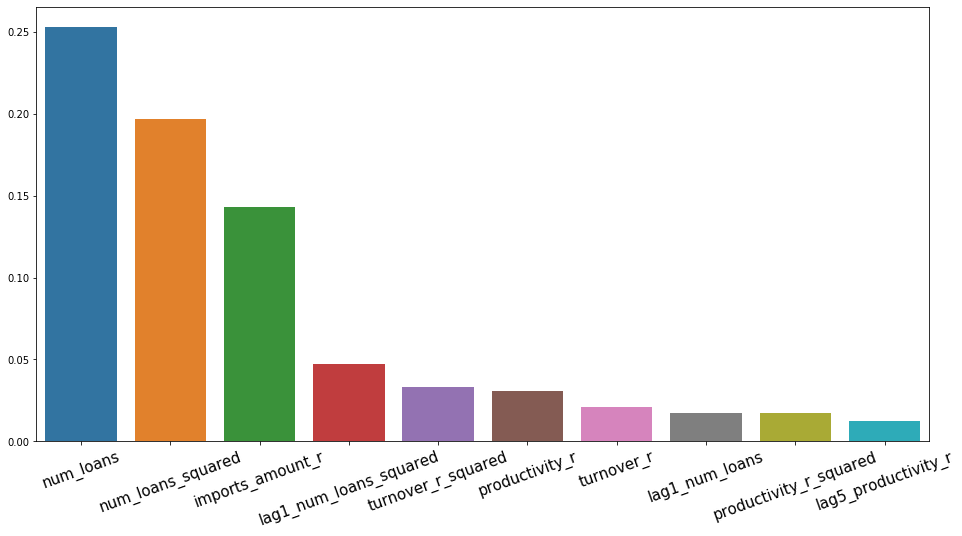

In [170]:
# feature importance:
plt.figure(figsize=(16,8))
nonzero = rf.feature_importances_!=0
sns.barplot(x=rf_importances.index[:10], y=rf_importances[:10])
plt.xticks(rotation=20, size=15)
plt.savefig('../../data/output/graphs/variable_importances/rf_importances.pdf', bbox_inches='tight')
plt.show()

In [138]:
important_features = rf_importances.index[:10].tolist()

In [162]:
signs = np.sign(res.params[important_features].round(4))
pvalues = res.pvalues[important_features].round(2)
signs_table = pd.DataFrame()
signs_table['sign'] = signs
signs_table['p-values'] = pvalues
#signs_table = signs_table.T

In [164]:
print(signs_table.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  sign &  p-values \\
\midrule
num\_loans              &   1.0 &      0.00 \\
num\_loans\_squared      &  -1.0 &      0.00 \\
imports\_amount\_r       &   0.0 &      0.00 \\
lag1\_num\_loans\_squared &  -1.0 &      0.00 \\
turnover\_r\_squared     &   0.0 &      0.00 \\
productivity\_r         &   0.0 &      0.13 \\
turnover\_r             &   0.0 &      0.00 \\
lag1\_num\_loans         &   1.0 &      0.00 \\
productivity\_r\_squared &   0.0 &      0.80 \\
lag5\_productivity\_r    &   0.0 &      0.77 \\
\bottomrule
\end{tabular}



In [101]:
from sklearn.tree import export_graphviz

export_graphviz(rf.estimators_[0],
                feature_names=X.columns,
                out_file='../../data/output/graphs/variable_importances/tree.dot',
                filled=True,
                rounded=True)
os.system('dot -Tpng ../../data/output/graphs/variable_importances/tree.dot -o ../../data/output/graphs/variable_importances/tree.png')


#dotfile = open("D:/dtree2.dot", 'w')
#export_graphviz(dtree, out_file = dotfile, feature_names = X_tr.columns)
#dotfile.close()

0

In [102]:
len(rf.estimators_)

100

# XGBoost

In [70]:
import xgboost as xgb

In [71]:
#xgbmodel = xgb.XGBRegressor()
#xgbmodel.fit(X_tr,y_tr)
#xgbmodel.score(X_tr, y_tr)

In [72]:
#xgbmodel.score(X_te, y_te)

In [73]:
#r2_score(y_te, xgbmodel.predict(X_te))

In [74]:
#xgb.plot_importance(xgbmodel, max_num_features=15)
#plt.show()

In [75]:
params = {'learning_rate': [0.05, 0.1, 0.3, 0.5,], # so called `eta` value
          'objective':['reg:squarederror'], # objective for internal optimization technique
          'eval_metric':['rmse'], 
          #'num_leaves': [6, 7, 8, 10, 25, 31, 35, 40, 50, 100, 200],
          'max_depth': [10, None],
          'min_child_weight': [11],
          #'subsample': [0.8],
          'colsample_bytree': [0.7],
          'n_estimators': [7, 10, 12, 15, 17, 20, 25], # number of trees 
          'missing':[-999],
          'reg_lambda':[1.5],
          'seed': [1337]}


In [76]:
%%time
xg = xgb.XGBRegressor()
best_xgb = GridSearchCV(
    xg, param_grid=params, cv=10, verbose=10, n_jobs=-1)

best_xgb.fit(X_tr, y_tr)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

CPU times: user 7.31 s, sys: 478 ms, total: 7.78 s
Wall time: 13min 44s


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'eval_metric': ['rmse'],
                         'learning_rate': [0.05, 0.1, 0.3, 0.5],
                         'max_depth': [10, None], 'min_child_weight': [11],
                         'missin

In [77]:
best_xgb.score(X_tr, y_tr)

0.35846311521031

In [78]:
best_xgb.score(X_te, y_te)

0.1895762784745777

In [79]:
#best_xgb.best_estimator_
#best_xgb.best_score_
#best_xgb.cv_results_
best_xgb.best_params_

{'colsample_bytree': 0.7,
 'eval_metric': 'rmse',
 'learning_rate': 0.3,
 'max_depth': None,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 12,
 'objective': 'reg:squarederror',
 'reg_lambda': 1.5,
 'seed': 1337}

In [80]:
r2_score(y_te, best_xgb.predict(X_te))

0.1895762784745777

In [81]:
xgb_best_model_refit = xgb.XGBRegressor(colsample_bytree=0.7,
                                        eval_metric='rmse',
                                        learning_rate=best_xgb.best_params_['learning_rate'],
                                        max_depth=best_xgb.best_params_['max_depth'],
                                        min_child_weight=11,
                                        missing=-999,
                                        n_estimators=best_xgb.best_params_['n_estimators'],
                                        objective='reg:squarederror',
                                        reg_lambda=1.5,
                                        seed=1337)
xgb_best_model_refit.fit(X_tr,y_tr)
xgb_best_model_refit.score(X_tr, y_tr)

0.35846311521031

In [82]:
xgb_best_model_refit.score(X_te, y_te)

0.1895762784745777

In [83]:
#xgb.plot_importance(xgb_best_model_refit, 
#                    max_num_features=15,
#                    title='Feature Importance by weight',
#                    importance_type='weight',
#                   )
#plt.show()

In [84]:
#xgb.plot_importance(xgb_best_model_refit, 
#                    max_num_features=15,
#                    title='Feature Importance by gain',
#                    importance_type='gain',
#                   )
#plt.show()

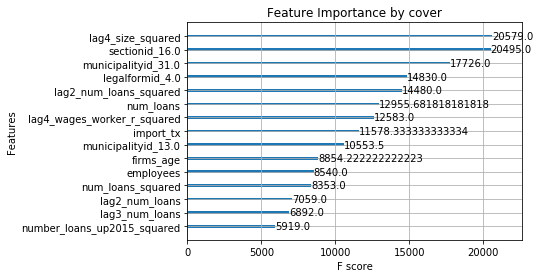

In [85]:
xgb.plot_importance(xgb_best_model_refit, 
                    max_num_features=15,
                    title='Feature Importance by cover',
                    importance_type='cover',
                   )
plt.show()

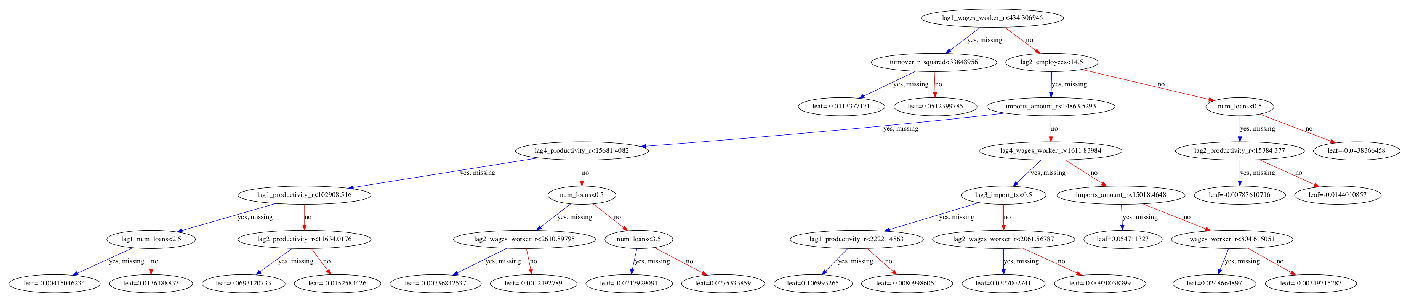

In [93]:
fig, ax = plt.subplots(figsize=(25, 12))
xgb.plot_tree(xgb_best_model_refit, 
              ax=ax, 
              num_trees=10,
              #rankdir='LR'
             )
#xgb.plot_tree(model, num_trees=4, ax=ax)
plt.savefig("tree.pdf")
plt.show()


In [87]:
#df_cond = df[df.num_loans<0.5]

#df_cond.groupby('credit_treatment_status')['municipalityid_31.0'].value_counts(normalize=True)